<h1> Project Proposal </h1>

<h2> Introduction </h2>

add intro here

<h2> Preliminary exploratory data analysis </h2>

In [3]:
# set up
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:
# reading in data
url <- "https://raw.githubusercontent.com/karlie-tr/dataset/main/Highest%20Holywood%20Grossing%20Movies.csv"
download.file(url, destfile = "highest-hollywood-grossing-movies.csv")
movies_data <- read_csv("highest-hollywood-grossing-movies.csv")

# remove white space in headers
colnames(movies_data) <- make.names(colnames(movies_data))
movies_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  Title = col_character(),
  `Movie Info` = col_character(),
  Distributor = col_character(),
  `Release Date` = col_character(),
  `Domestic Sales (in $)` = col_double(),
  `International Sales (in $)` = col_double(),
  `World Sales (in $)` = col_double(),
  Genre = col_character(),
  `Movie Runtime` = col_character(),
  License = col_character()
)



X1,Title,Movie.Info,Distributor,Release.Date,Domestic.Sales..in...,International.Sales..in...,World.Sales..in...,Genre,Movie.Runtime,License
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a desert scavenger, and Finn, an ex-stormtrooper, must join Han Solo and Chewbacca to search for the one hope of restoring peace.",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),"After the devastating events of Avengers: Infinity War, the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.",Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
915,Eat Pray Love (2010),"A married woman realizes how unhappy her marriage really is, and that her life needs to go in a different direction. After a painful divorce, she takes off on a round-the-world journey to ""find herself"".",Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),"After picking up a traumatized young hitchhiker, five friends find themselves stalked and hunted by a deformed chainsaw-wielding loon and his family of equally psychopathic killers.",New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R
917,Zookeeper (2011),"A group of zoo animals decide to break their code of silence in order to help their lovable zookeeper find love, without opting to leave his current job for something more illustrious.",Sony Pictures Entertainment (SPE),"July 6, 2011",80360843,89491916,169852759,"['Comedy', 'Family', 'Fantasy', 'Romance']",1 hr 42 min,PG


In [5]:
# remove unusable columns
vars <- c("Title","Distributor","Release.Date","World.Sales..in...","Genre","Movie.Runtime") # vars that we want to keep
movies_data_filtered <- movies_data %>%
                        select(all_of(vars))

# change column name
colnames(movies_data_filtered) <- c("Title", "Distributor","Release_Date","World_Sales","Genre","Runtime")

# remove all white space in dataframe
movies_data_no_space <- as.data.frame(apply(movies_data_filtered, 2, str_remove_all, " "))

# separate release year from Release_Date
movies_release_date <- separate(movies_data_no_space,
                            col = Release_Date,
                            into = c("date", "Release_Year"),
                            sep = ","
                           )

# separate release year from movie title
movies_release_date <- separate(movies_release_date,
                            col = Title,
                            into = c("Title", "year"),
                            sep = "[()]"
                           )

# filter for movies released since 2010, remove NAs
movies_2010 <- movies_release_date %>%
                    select(-date, -year) %>%
                    filter(Release_Year >= 2010)
      

movies_2010                 

Warning message:
“Expected 2 pieces. Additional pieces discarded in 918 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Title,Distributor,Release_Year,World_Sales,Genre,Runtime
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
StarWars:EpisodeVII-TheForceAwakens,WaltDisneyStudiosMotionPictures,2015,2069521700,"['Action','Adventure','Sci-Fi']",2hr18min
Avengers:Endgame,WaltDisneyStudiosMotionPictures,2019,2797501328,"['Action','Adventure','Drama','Sci-Fi']",3hr1min
JurassicWorld,UniversalPictures,2015,1670516444,"['Action','Adventure','Sci-Fi']",2hr4min
⋮,⋮,⋮,⋮,⋮,⋮
Ted2,UniversalPictures,2015,215863606,['Comedy'],1hr55min
EatPrayLove,SonyPicturesEntertainment(SPE),2010,204594016,"['Biography','Drama','Romance']",2hr13min
Zookeeper,SonyPicturesEntertainment(SPE),2011,169852759,"['Comedy','Family','Fantasy','Romance']",1hr42min


In [6]:
# tidying genre column

genre_list <- movies_data %>%
    select(Genre) %>%
    # remove brackets, quotation marks, and spaces from string
    mutate(Genre = str_replace_all(string = Genre, pattern = regex("[]\\[\' ]"), replacement = "")) %>% 
    # change string into list
    mutate(Genre = as.list(strsplit(Genre, ","))) %>%
    # make a list of all unique values
    pull() %>%
    flatten() %>%
    unique()

genre_list

[[1]]
[1] "Action"

[[2]]
[1] "Adventure"

[[3]]
[1] "Sci-Fi"

[[4]]
[1] "Drama"

[[5]]
[1] "Fantasy"

[[6]]
[1] "Romance"

[[7]]
[1] "Animation"

[[8]]
[1] "Comedy"

[[9]]
[1] "Family"

[[10]]
[1] "Musical"

[[11]]
[1] "Crime"

[[12]]
[1] "Thriller"

[[13]]
[1] "War"

[[14]]
[1] "Mystery"

[[15]]
[1] "Biography"

[[16]]
[1] "Horror"

[[17]]
[1] "Sport"

[[18]]
[1] "Music"

[[19]]
[1] "History"

[[20]]
[1] "Western"

[[21]]
[1] "Documentary"

In [7]:
# creating columns for each genre

for(i in genre_list)
  { 
    movies_genres <- movies_genres %>%
        mutate(!!i := i %in% Genre)  
}


movies_genres

ERROR: Error in eval(lhs, parent, parent): object 'movies_genres' not found


In [8]:
# tidying Runtime column
movies_2010_separate_runtime <- separate(movies_2010,
                                            col = Runtime,
                                            into = c("Runtime_hr", "Runtime_min"),
                                            sep = "hr"
                                         )
# remove min from Runtime_min
movies_2010_separate_minute <- separate(movies_2010_separate_runtime,
                                        col = Runtime_min,
                                        into = c("Runtime_min"),
                                        sep = "min"
                                       )

# change hr and time into duration (minutes)
numeric_duration <- movies_2010_separate_minute %>%
                    select(Runtime_hr, Runtime_min) %>%
                    as.data.frame() %>%
                    mutate(Runtime_hr = as.numeric(Runtime_hr)) %>%
                    mutate(Runtime_min = as.numeric(Runtime_min)) %>%
                    mutate(Duration = Runtime_hr * 60 + Runtime_min) %>%
                    select(Duration)

# Merge Duration (runtime in minutes) with movies_2010
movies_2010_tidy <- movies_2010 %>%
                    select(-Runtime) %>%
                    cbind(numeric_duration) %>%                                 # bind the new column into the df
                    mutate(Release_Year = as.numeric(Release_Year)) %>%         # change data type
                    mutate(World_Sales = as.numeric(World_Sales)) %>%           # change data type
                    mutate(Distributor = as.factor(Distributor)) 

movies_2010_tidy



Warning message:
“Expected 1 pieces. Additional pieces discarded in 352 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Title,Distributor,Release_Year,World_Sales,Genre,Duration
<chr>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
StarWars:EpisodeVII-TheForceAwakens,WaltDisneyStudiosMotionPictures,2015,2069521700,"['Action','Adventure','Sci-Fi']",138
Avengers:Endgame,WaltDisneyStudiosMotionPictures,2019,2797501328,"['Action','Adventure','Drama','Sci-Fi']",181
JurassicWorld,UniversalPictures,2015,1670516444,"['Action','Adventure','Sci-Fi']",124
⋮,⋮,⋮,⋮,⋮,⋮
Ted2,UniversalPictures,2015,215863606,['Comedy'],115
EatPrayLove,SonyPicturesEntertainment(SPE),2010,204594016,"['Biography','Drama','Romance']",133
Zookeeper,SonyPicturesEntertainment(SPE),2011,169852759,"['Comedy','Family','Fantasy','Romance']",102


In [9]:
# split data into training and testing set
set.seed(20)
movies_split <- initial_split(movies_2010_tidy, prop = 0.75, strata = World_Sales)
movies_train <- training(movies_split)
movies_test <- training(movies_split)

In [10]:
# exploratory data analysis on training data

# distributors within the top grossing movies released since 2010
num_obs <- nrow(movies_train) 

movies_train %>%
    group_by(Distributor) %>%
    summarize(count = n(), percentage = n() / num_obs * 100) %>%
    arrange(desc(percentage))                                         # arrange by % of distributors

`summarise()` ungrouping output (override with `.groups` argument)



Distributor,count,percentage
<fct>,<int>,<dbl>
WarnerBros.,52,19.11765
UniversalPictures,45,16.54412
TwentiethCenturyFox,42,15.44118
⋮,⋮,⋮
RoadsideAttractions,1,0.3676471
SummitEntertainment,1,0.3676471
UnitedArtistsReleasing,1,0.3676471


`summarise()` ungrouping output (override with `.groups` argument)



Distributor,n
<fct>,<int>
WarnerBros.,52
UniversalPictures,45
TwentiethCenturyFox,42
SonyPicturesEntertainment(SPE),35
WaltDisneyStudiosMotionPictures,35


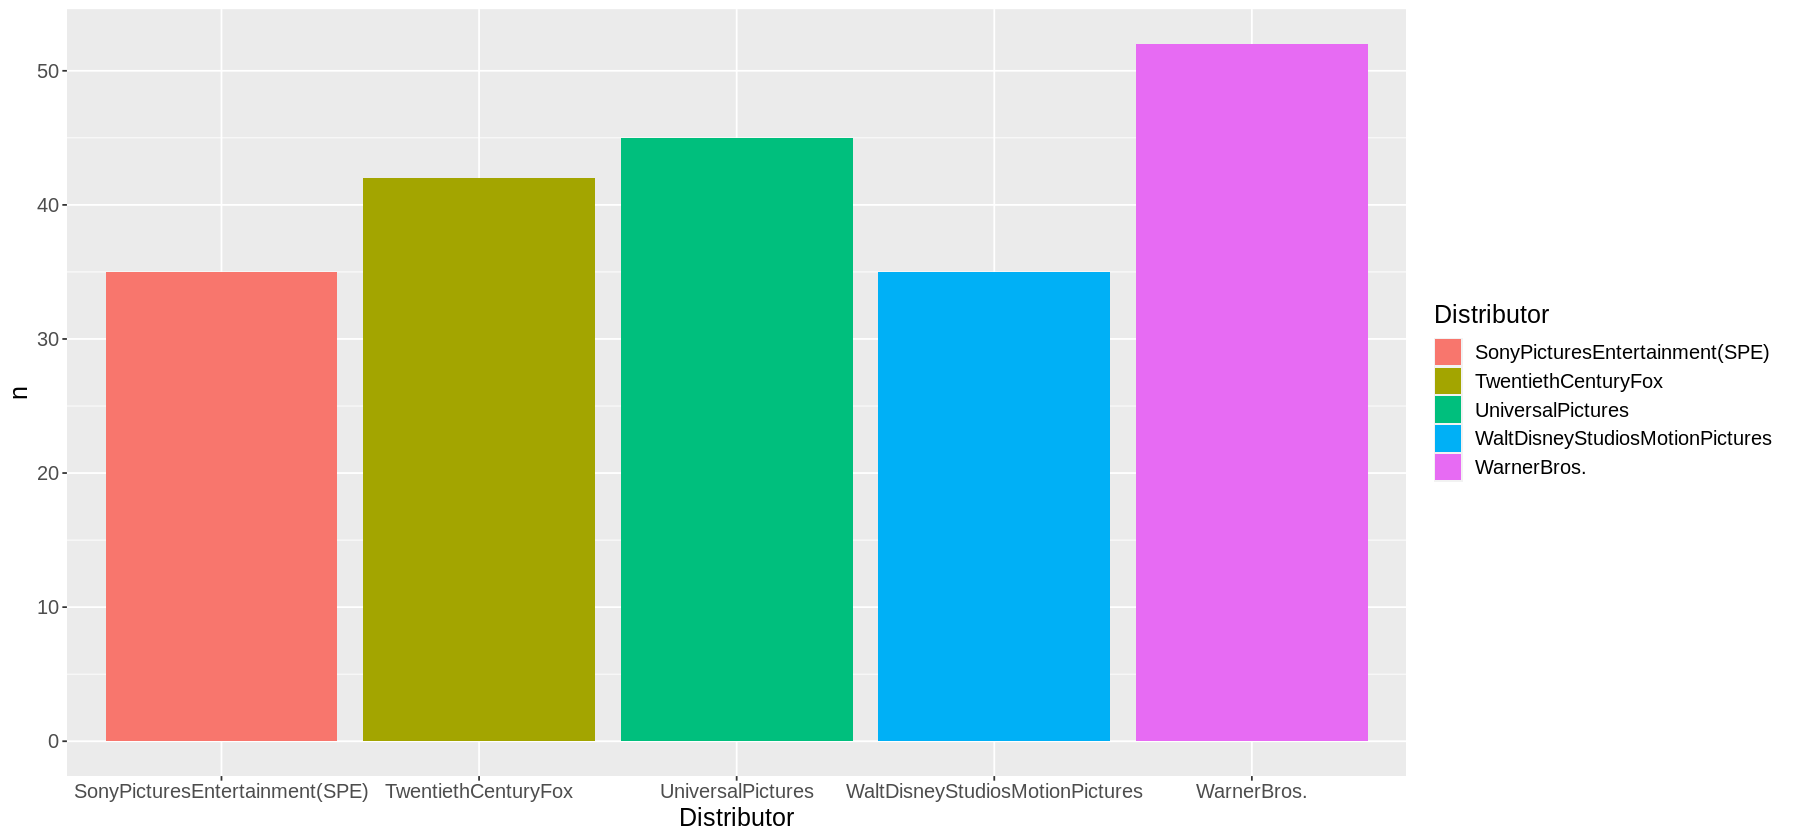

In [11]:
#Visualization of movie distributors and movie sales
#where n is the number of top movies
top_5_distributors <- movies_train %>%
    filter(Distributor %in% c("WarnerBros.", "UniversalPictures", "TwentiethCenturyFox", 
                               "SonyPicturesEntertainment(SPE)", "WaltDisneyStudiosMotionPictures")) %>% 
    group_by(Distributor) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) %>% 
    head(n = 10)
top_5_distributors

top_distributors_plot <- top_5_distributors %>%
    ggplot(aes(x = Distributor, y = n, fill = Distributor)) + 
    geom_bar(stat = "identity") +
    xlab("Distributor") +
    ylab("n") +
    labs(fill = "Distributor") +
    theme(text = element_text(size = 15))
options(repr.plot.width = 15, repr.plot.height = 7)

top_distributors_plot

Title,Distributor,Release_Year,World_Sales,Genre,Duration
<chr>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
StarWars:EpisodeVII-TheForceAwakens,WaltDisneyStudiosMotionPictures,2015,2069521700,"['Action','Adventure','Sci-Fi']",138
Avengers:Endgame,WaltDisneyStudiosMotionPictures,2019,2797501328,"['Action','Adventure','Drama','Sci-Fi']",181
TheAvengers,WaltDisneyStudiosMotionPictures,2012,1518815515,"['Action','Adventure','Sci-Fi']",143
⋮,⋮,⋮,⋮,⋮,⋮
MazeRunner:TheScorchTrials,TwentiethCenturyFox,2015,312296056,"['Action','Adventure','Sci-Fi','Thriller']",131
Ted2,UniversalPictures,2015,215863606,['Comedy'],115
Zookeeper,SonyPicturesEntertainment(SPE),2011,169852759,"['Comedy','Family','Fantasy','Romance']",102


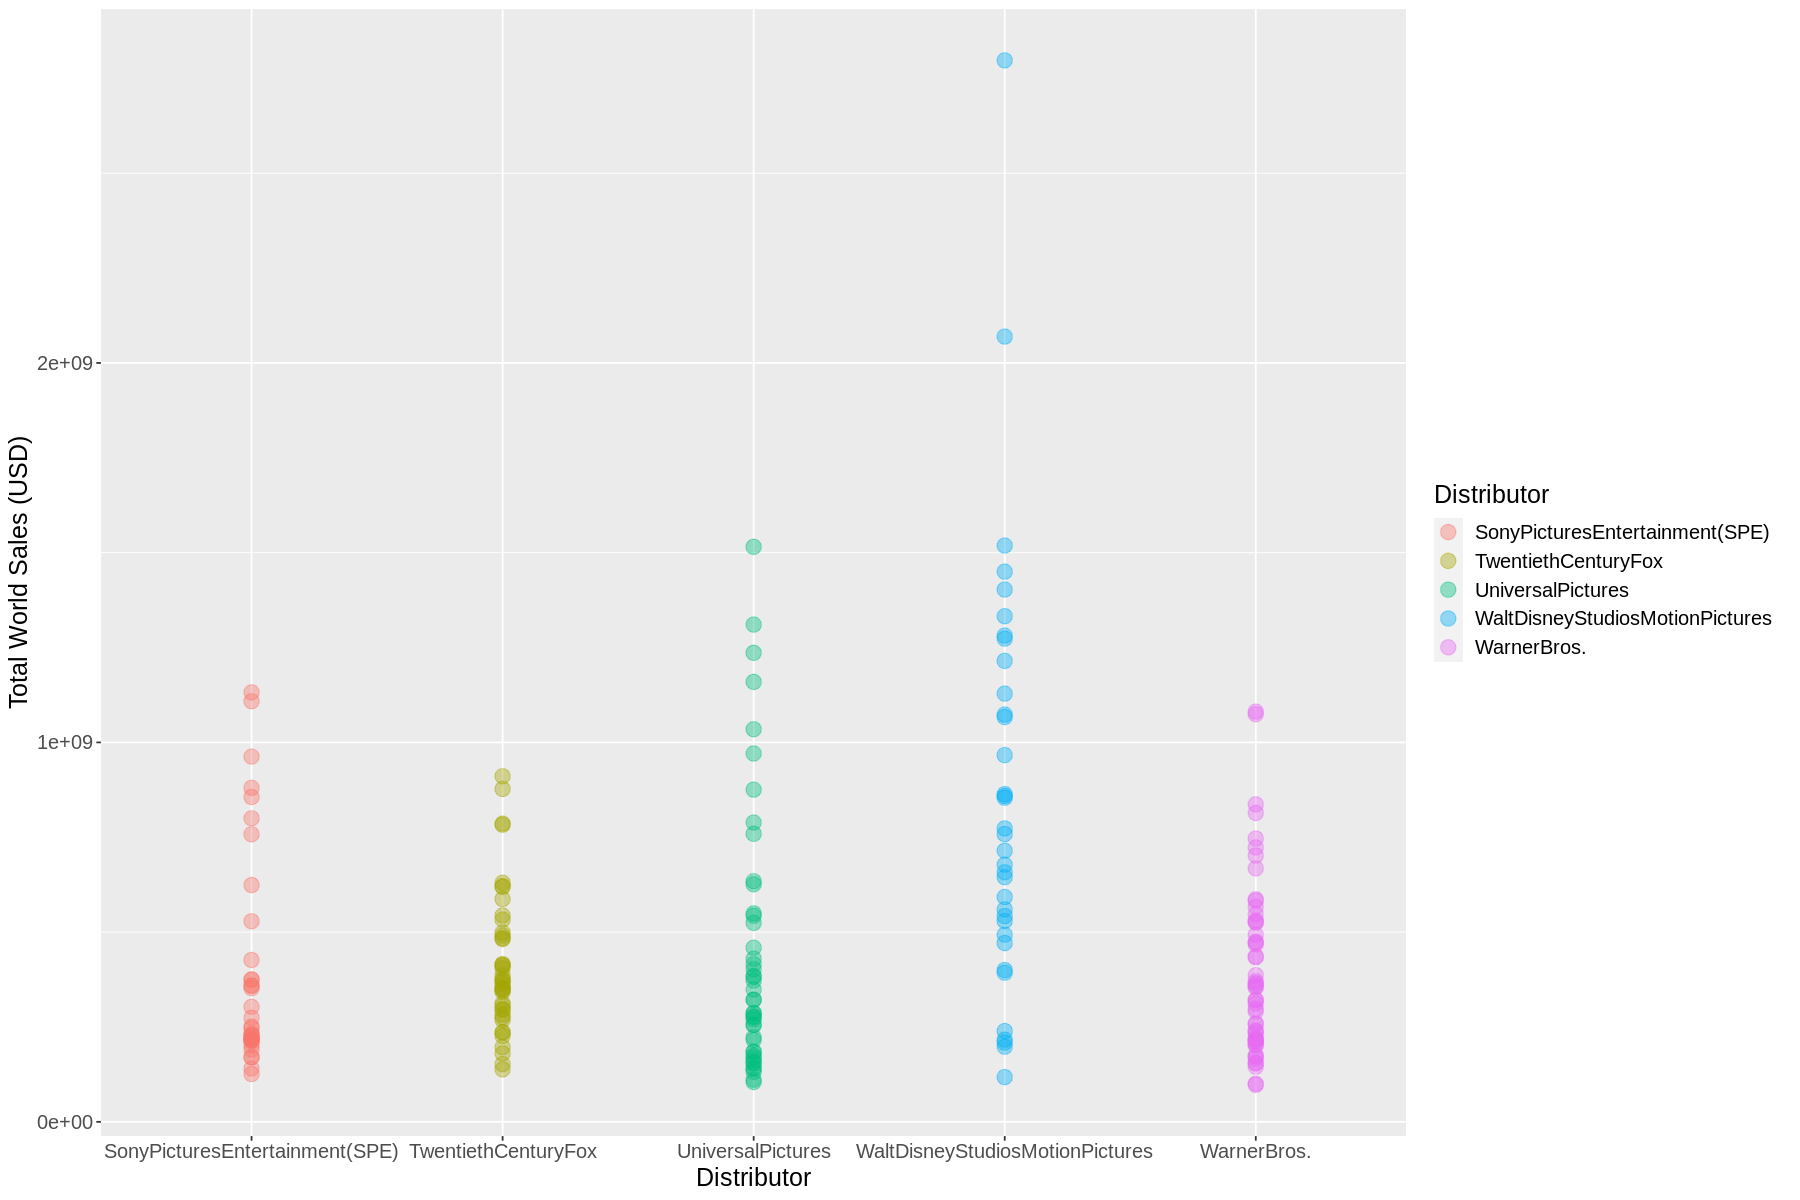

In [12]:
top_distributors <- movies_train %>%
    filter(Distributor %in% c("WarnerBros.", "UniversalPictures", "TwentiethCenturyFox", 
                               "SonyPicturesEntertainment(SPE)", "WaltDisneyStudiosMotionPictures")) 
top_distributors

distributor_sales_plot <- top_distributors%>%
    ggplot(aes(x = Distributor, y = World_Sales, color = Distributor)) + 
    geom_point(alpha = 0.4, size = 4) +
    xlab("Distributor") +
    ylab("Total World Sales (USD)") +
    labs(fill = "Distributor") +
    theme(text = element_text(size = 15))
options(repr.plot.width = 15, repr.plot.height = 10)
distributor_sales_plot

In [ ]:
#KNN Regression Scaffolding


<h2> Methods </h2>

add method

<h2> Expected Outcomes and Significance </h2>

outcome